In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jax
import jax.numpy as jnp
from jax import random
import time

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

# interpolation
from scipy.interpolate import CubicSpline

# pre-processing
from sklearn.preprocessing import StandardScaler

# smoothing
import statsmodels.api as sm
from scipy.ndimage import gaussian_filter1d

# collocation
import sys
import os
collocation2_path = os.path.abspath(os.path.join('..', '00_utils'))

if collocation2_path not in sys.path:
    sys.path.append(collocation2_path)

from collocation import compute_weights, lagrange_derivative
from non_parametric_collocation import collocate_data

# pyomo
import importlib
import neural_net_pyomo

importlib.reload(neural_net_pyomo)
NeuralODEPyomo = neural_net_pyomo.NeuralODEPyomo

collocation_path = os.path.abspath(os.path.join('..', 'utils'))

if collocation_path not in sys.path:
    sys.path.append(collocation_path)
    
from interpolation import BarycentricInterpolation

data = pd.read_csv('df_train.csv')

In [18]:
data = data[data.settlement_date >= '2010-01-01']
data = data[data.settlement_date < '2011-01-01']
data.reset_index(drop=True, inplace=True)

data.loc[:,'hour'] = pd.to_datetime(data['settlement_date']).dt.hour

# select the main columns for the intial testing
data_subsample = data[['temperature', 'hour', 'nd']][:1000]

t = jnp.linspace(0., 1., data_subsample.shape[0])

def generate_chebyshev_nodes(n, start, end):
    k = np.arange(n)
    x = np.cos(np.pi * k / (n - 1))
    nodes = 0.5 * (end - start) * x + 0.5 * (start + end)
    return np.sort(nodes)

# interpolate the whole dataset
cs_temp = CubicSpline(t, data_subsample['temperature'])
cs_hour = CubicSpline(t, data_subsample['hour'])
cs_nd = CubicSpline(t, data_subsample['nd'])

In [22]:
t[0 : 0 + 48]

Array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705], dtype=float64)

In [27]:
t.shape

(1000,)

t_train min: 0.0, t_train max: 0.04704704704704705
y
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
                     variables with only lower bounds:        0
           

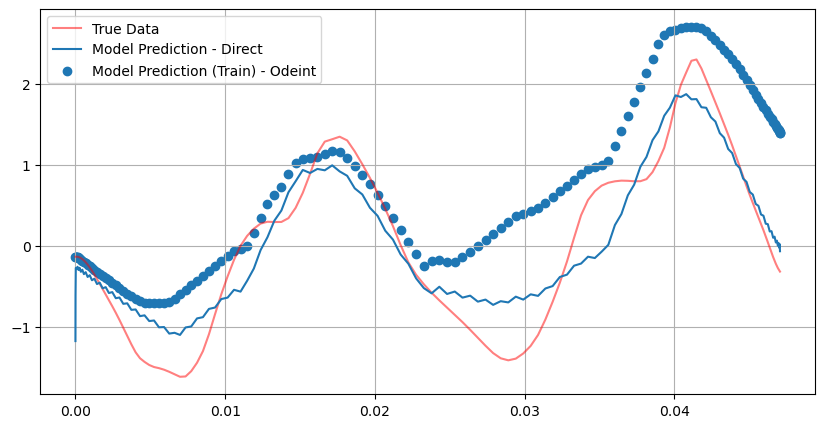

t_train min: 0.04804804804804805, t_train max: 0.09509509509509509
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
      

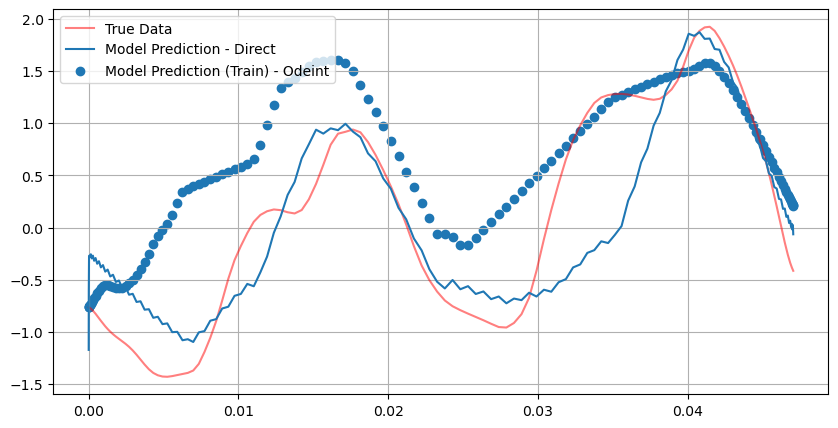

t_train min: 0.0960960960960961, t_train max: 0.14314314314314314
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
       

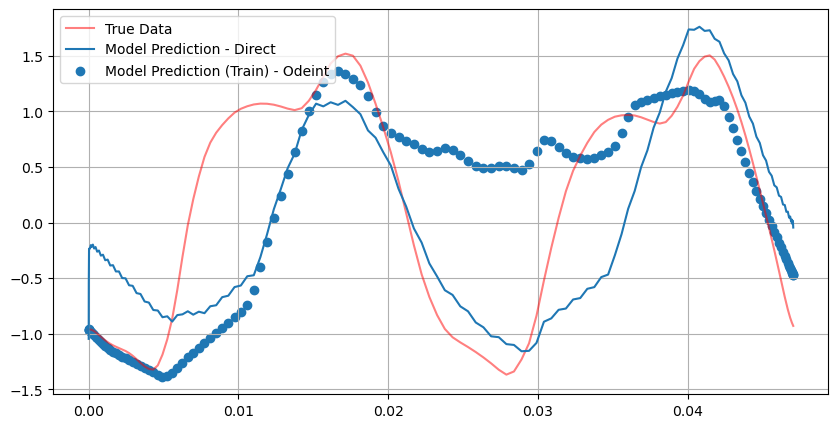

t_train min: 0.14414414414414414, t_train max: 0.19119119119119118
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
      

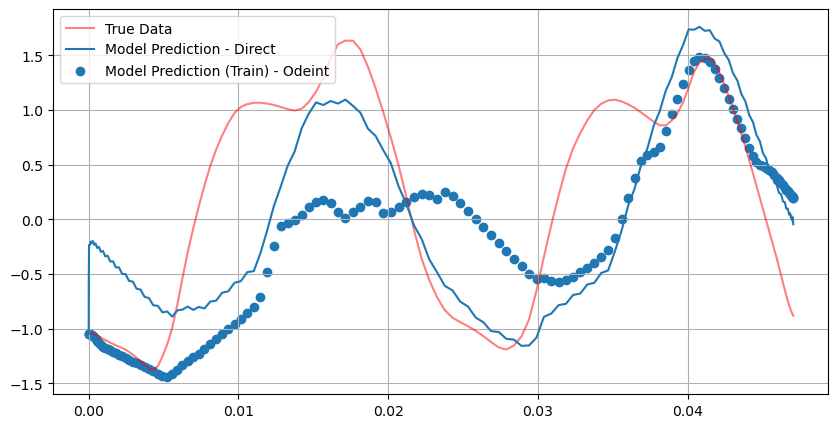

t_train min: 0.1921921921921922, t_train max: 0.23923923923923923
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
       

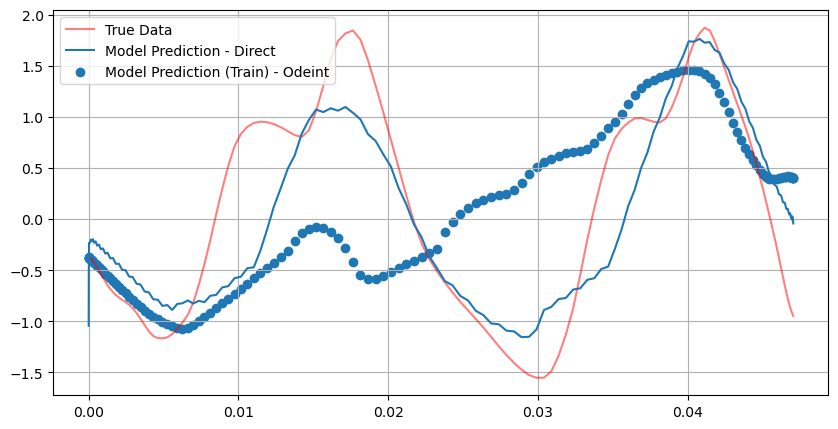

t_train min: 0.24024024024024024, t_train max: 0.2872872872872873
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
       

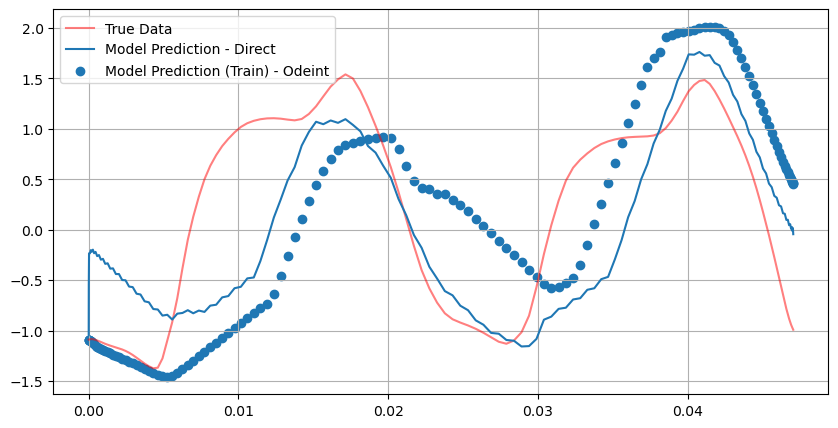

t_train min: 0.2882882882882883, t_train max: 0.3353353353353353
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

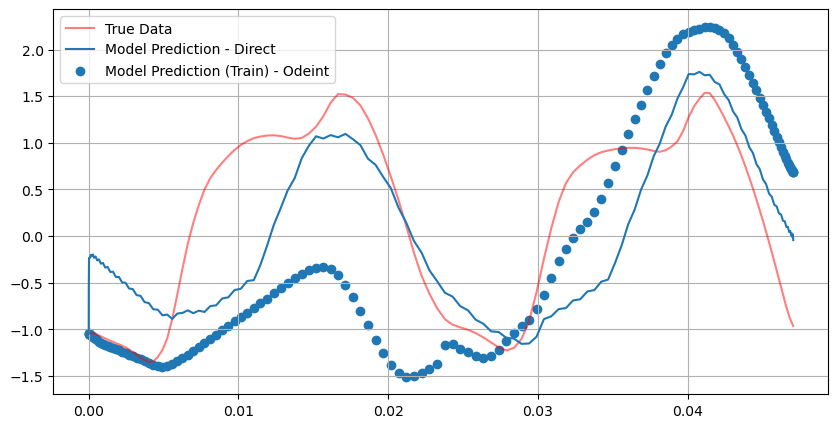

t_train min: 0.3363363363363363, t_train max: 0.3833833833833834
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

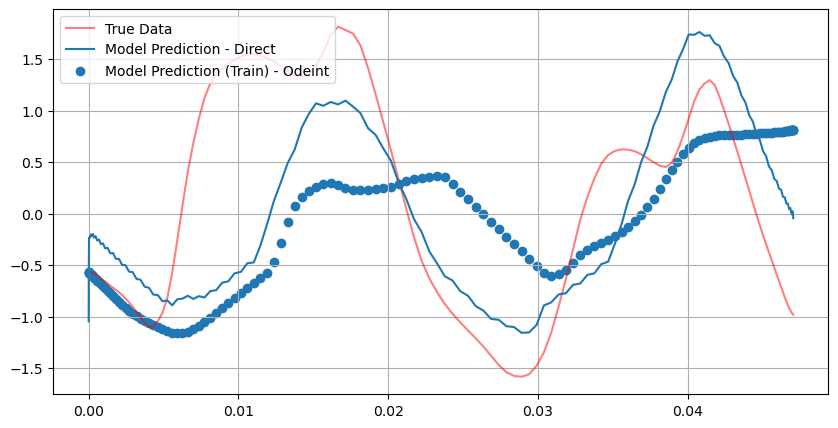

t_train min: 0.3843843843843844, t_train max: 0.4314314314314314
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

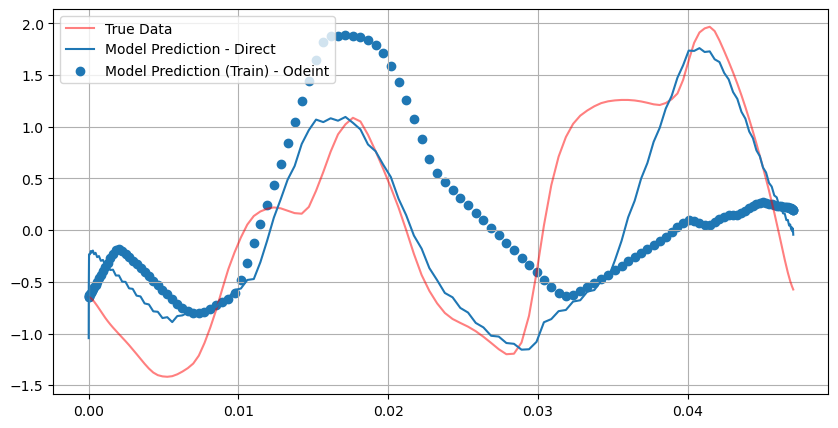

t_train min: 0.43243243243243246, t_train max: 0.4794794794794795
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
       

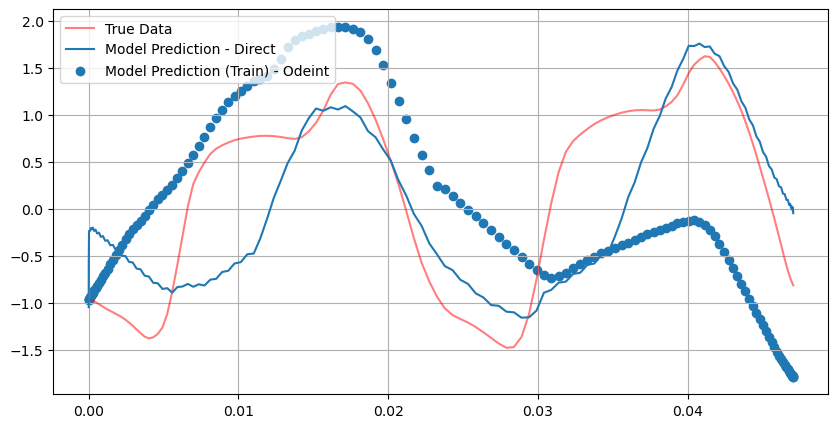

t_train min: 0.4804804804804805, t_train max: 0.5275275275275275
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

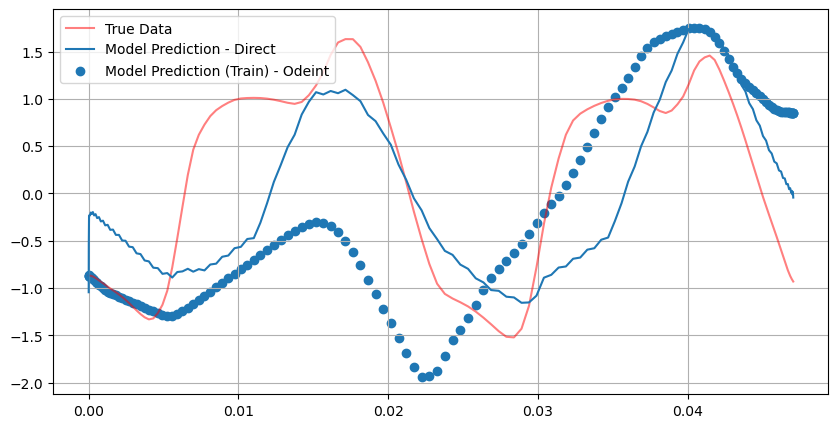

t_train min: 0.5285285285285285, t_train max: 0.5755755755755756
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

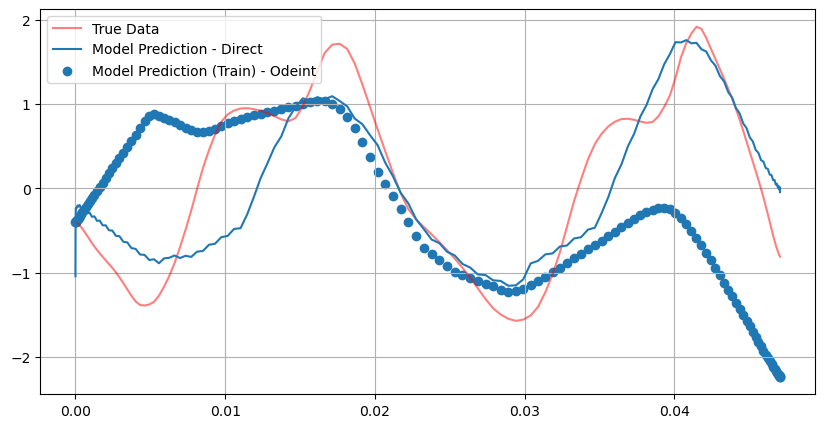

t_train min: 0.5765765765765766, t_train max: 0.6236236236236237
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

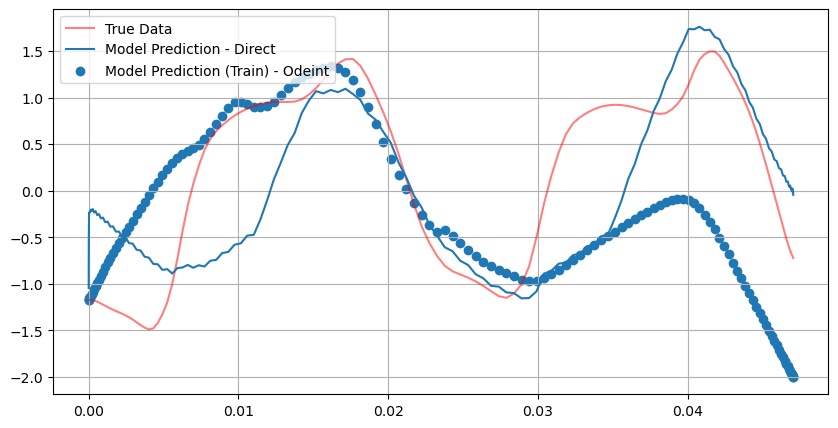

t_train min: 0.6246246246246246, t_train max: 0.6716716716716716
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

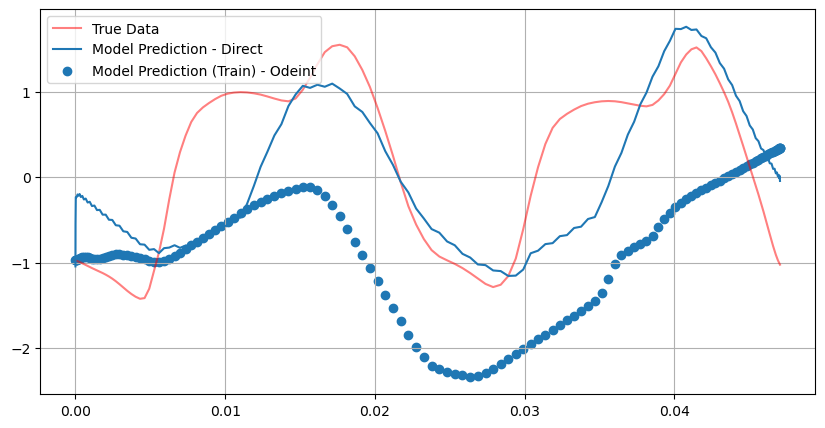

t_train min: 0.6726726726726726, t_train max: 0.7197197197197197
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

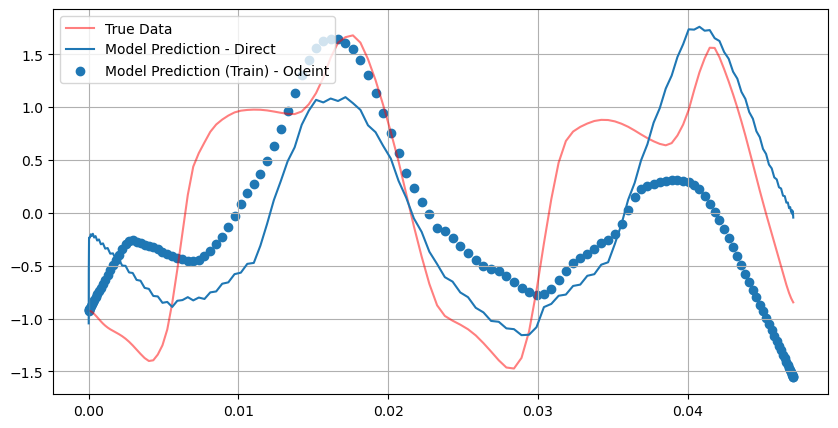

t_train min: 0.7207207207207207, t_train max: 0.7677677677677678
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

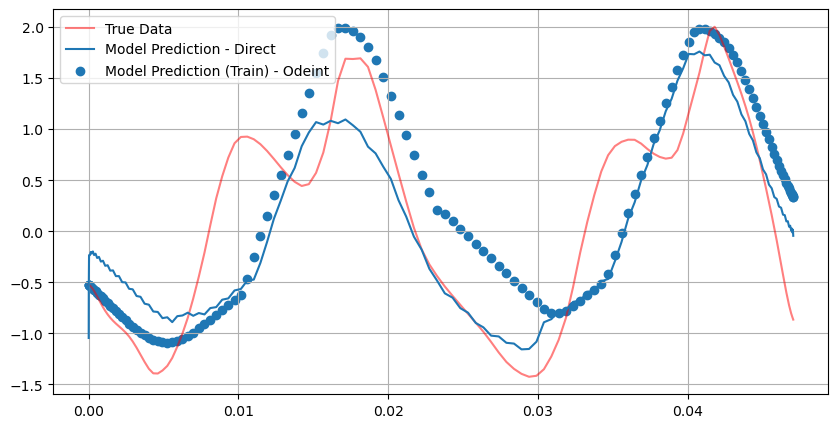

t_train min: 0.7687687687687688, t_train max: 0.8158158158158159
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

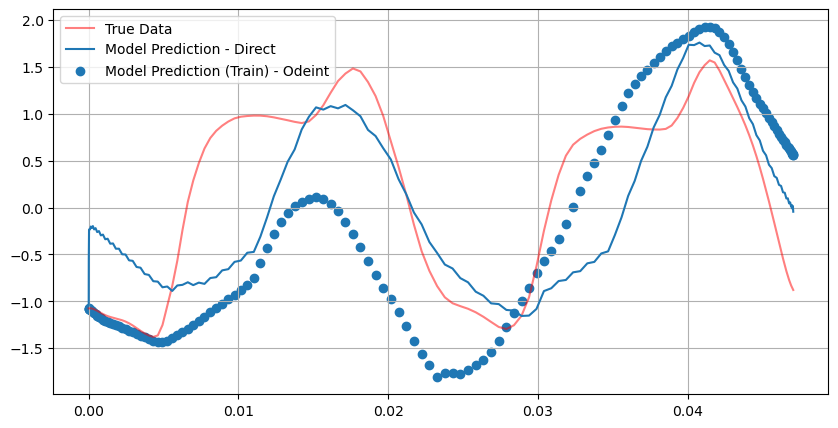

t_train min: 0.8168168168168168, t_train max: 0.8638638638638638
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

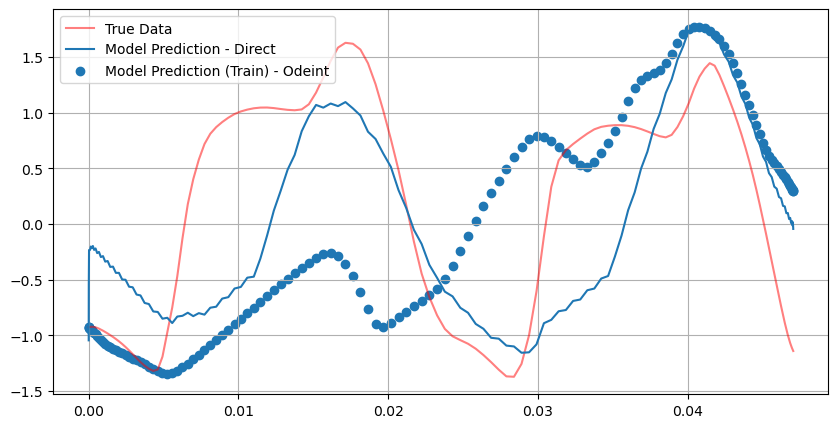

t_train min: 0.8648648648648649, t_train max: 0.9119119119119119
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
        

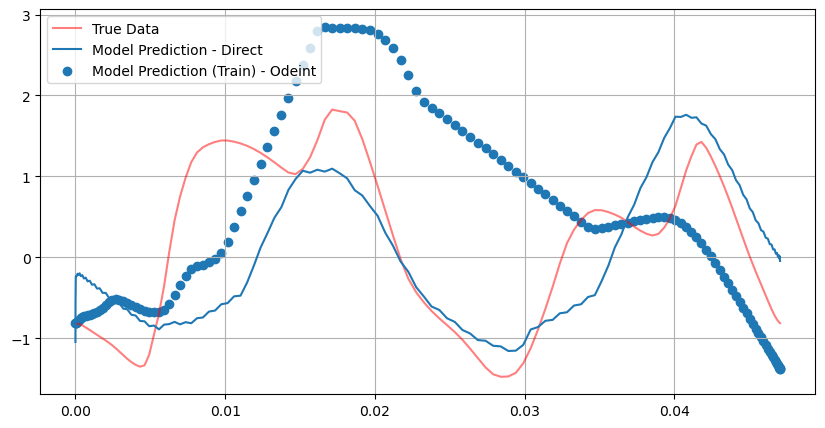

t_train min: 0.9129129129129129, t_train max: 0.95995995995996
y_observed has been updated.
model.y has been updated.
Ipopt 3.14.16: tol=1e-09
dual_inf_tol=1e-09
compl_inf_tol=1e-09
constr_viol_tol=1e-09
acceptable_iter=0
halt_on_ampl_error=yes
print_level=5
max_iter=1000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.1.

Number of nonzeros in equality constraint Jacobian...:    42185
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    32341

Total number of variables............................:      295
          

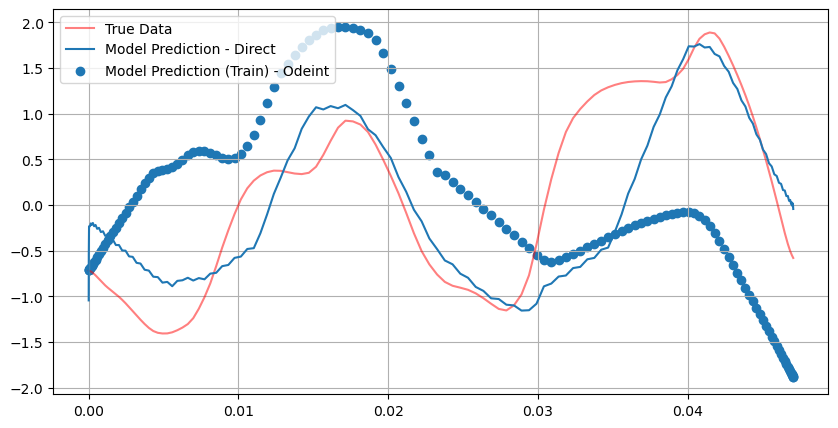

In [39]:
import neural_net_pyomo_2

importlib.reload(neural_net_pyomo_2)
NeuralODEPyomo = neural_net_pyomo_2.NeuralODEPyomo

# generate batches
index = 0
for i in range(20):
    t_train = t[index : index + 48]
    index += 48 # move the index
    
    if i == 0:
        n = t_train.shape[0]*3
        
    # generate chebyshev nodes in the interval
    x_train_cheb = generate_chebyshev_nodes(n, t_train.min(), t_train.max())
    print(f"t_train min: {t_train.min()}, t_train max: {t_train.max()}")
    
    y_train_temp = cs_temp(x_train_cheb)
    y_train_hour = cs_hour(x_train_cheb)
    y_train_nd = cs_nd(x_train_cheb)

    #----------------------------------COMBINE INTO TRAIN--------------------------------------#
    X_train = np.vstack([y_train_temp, y_train_hour]).T
    X_train = pd.DataFrame(X_train, columns=['temperature', 'hour'])
    y_train = pd.DataFrame(y_train_nd)

    #---------------------------------------SCALE--------------------------------------------#
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(X_train_scaled)
    X_train_scaled.columns = X_train.columns
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
    
    lowess = sm.nonparametric.lowess
    y_smoothed = lowess(np.squeeze(y_train_scaled), x_train_cheb, frac=0.05)  # `frac` is the fraction of data used for each local model
    y_new = y_smoothed[:, 1]
    x_new = y_smoothed[:, 0]

    y_new_gaussian = gaussian_filter1d(y_new, sigma=1)
    cs_y_new = CubicSpline(x_new, y_new_gaussian)
    y_train_cheb = cs_y_new(x_train_cheb)
    
    if i == 0:
        weights = compute_weights(x_train_cheb)
        D = np.array(lagrange_derivative(x_train_cheb, weights))
    
    y = y_train_cheb
    ys = np.array(y)
    ys = np.atleast_2d(ys).T
    if i == 0:
        ts = np.array(x_train_cheb)
        Ds = np.array(D)
        
    extra_input = np.array(X_train_scaled)
    
    # check the data
    # plt.figure(figsize=(10, 5))
    # plt.plot(ts, ys, 'r', label='True Data', alpha = 0.5)
    # plt.plot(ts, extra_input, label='Model Prediction - Direct')
    # plt.legend(loc ="upper left")
    # plt.grid(True)
    # plt.show()
    
    if i == 0: # on the first iteration, create the model
        layer_widths = [3, 30, 1]
        # solver.options['print_level'] = 5
        tol = 1e-9
        params = {"tol":1e-9, 
                "dual_inf_tol": tol, 
                "compl_inf_tol": tol,
                "constr_viol_tol": tol, 
                
                # repeat the same for the acceptable tolerances
                # "acceptable_tol": 1e-15,
                # "acceptable_constr_viol_tol": 1e-15,
                # "acceptable_dual_inf_tol": 1e-15,
                # "acceptable_compl_inf_tol": 1e-15,
                "acceptable_iter": 0, 
                
                "halt_on_ampl_error" : 'yes',
                "print_level": 5, 
                #"hessian_approximation": 'limited-memory', 
                #"mu_strategy": 'adaptive', 
                #"check_derivatives_for_naninf": 'yes',
                "max_iter": 1000}

        ode_model = NeuralODEPyomo(np.array(ys), # y
                                np.array(ts), # t
                                np.array(Ds),
                                
                                layer_widths, act_func = "tanh", 
                                y_init = ys, 
                                penalty_lambda_reg = 0.001, 
                                penalty_lambda_input = 0.001, 
                                time_invariant=True,
                                extra_input = extra_input, # X
                                w_init_method = 'random', 
                                params = params
                                )

        ode_model.build_model()

    else:
        ode_model.update_y_observed(np.array(ys))
        ode_model.update_model_y(np.array(ys))
        
        y_check = ode_model.extract_y_observed()
        continue
        
    result = ode_model.solve_model()
    u_model = ode_model.extract_solution().T
    
    y0 = ys[0]
    y_pred = ode_model.neural_ode(y0, ts, (extra_input, ts))
    y1 = y_pred[-1]

    plt.figure(figsize=(10, 5))
    plt.plot(ts, ys, 'r', label='True Data', alpha = 0.5)

    plt.plot(ts, u_model, label='Model Prediction - Direct')
    plt.scatter(ts, y_pred, label='Model Prediction (Train) - Odeint')
    plt.legend(loc ="upper left")
    plt.grid(True)
    plt.show()